In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [41]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
import time
from PIL import Image
from io import BytesIO
from adjustText import adjust_text
from scipy.interpolate import interp1d

from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashteamclutch import LeagueDashTeamClutch

In [4]:
plt.style.use('fivethirtyeight')

In [9]:
pull_up_stats = LeagueDashPtStats(season='2021-22', pt_measure_type='PullUpShot', per_mode_simple='PerGame', player_or_team='Player').get_data_frames()[0]

In [16]:
non_playoff_teams = [
    'LAL',
    'SAC',
    'POR',
    'OKC',
    'HOU',
    'NYK',
    'DET',
    'ORL',
    'SAS',
    'IND',
    'WAS',
    'CHA'
]

In [17]:
playoff_only = pull_up_stats.loc[~pull_up_stats.TEAM_ABBREVIATION.isin(non_playoff_teams)]

In [24]:
playoff_only = playoff_only.loc[(playoff_only.MIN > 15) & (playoff_only.GP > 20)]

In [28]:
playoff_only.sort_values(by='PULL_UP_FGA', ascending=False).iloc[:45].TEAM_ABBREVIATION.value_counts()

DAL    4
GSW    3
MIL    3
NOP    3
LAC    3
UTA    3
MEM    3
BKN    3
PHI    3
TOR    3
MIN    2
CLE    2
BOS    2
ATL    2
CHI    2
MIA    2
PHX    2
Name: TEAM_ABBREVIATION, dtype: int64

In [30]:
top_players = playoff_only.sort_values(by='PULL_UP_FGA', ascending=False).iloc[:45]

In [32]:
top_players.loc[:, 'PULL_UP_EFG_PCT'] = top_players.PULL_UP_EFG_PCT * 100

In [38]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


import matplotlib.ticker as mtick

zoom = 0.6
team_root_dir = '../../team_logos_id/'
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

Text(0.5, 1.0, 'Best pull up shot makers among the playoff+play-in teams')

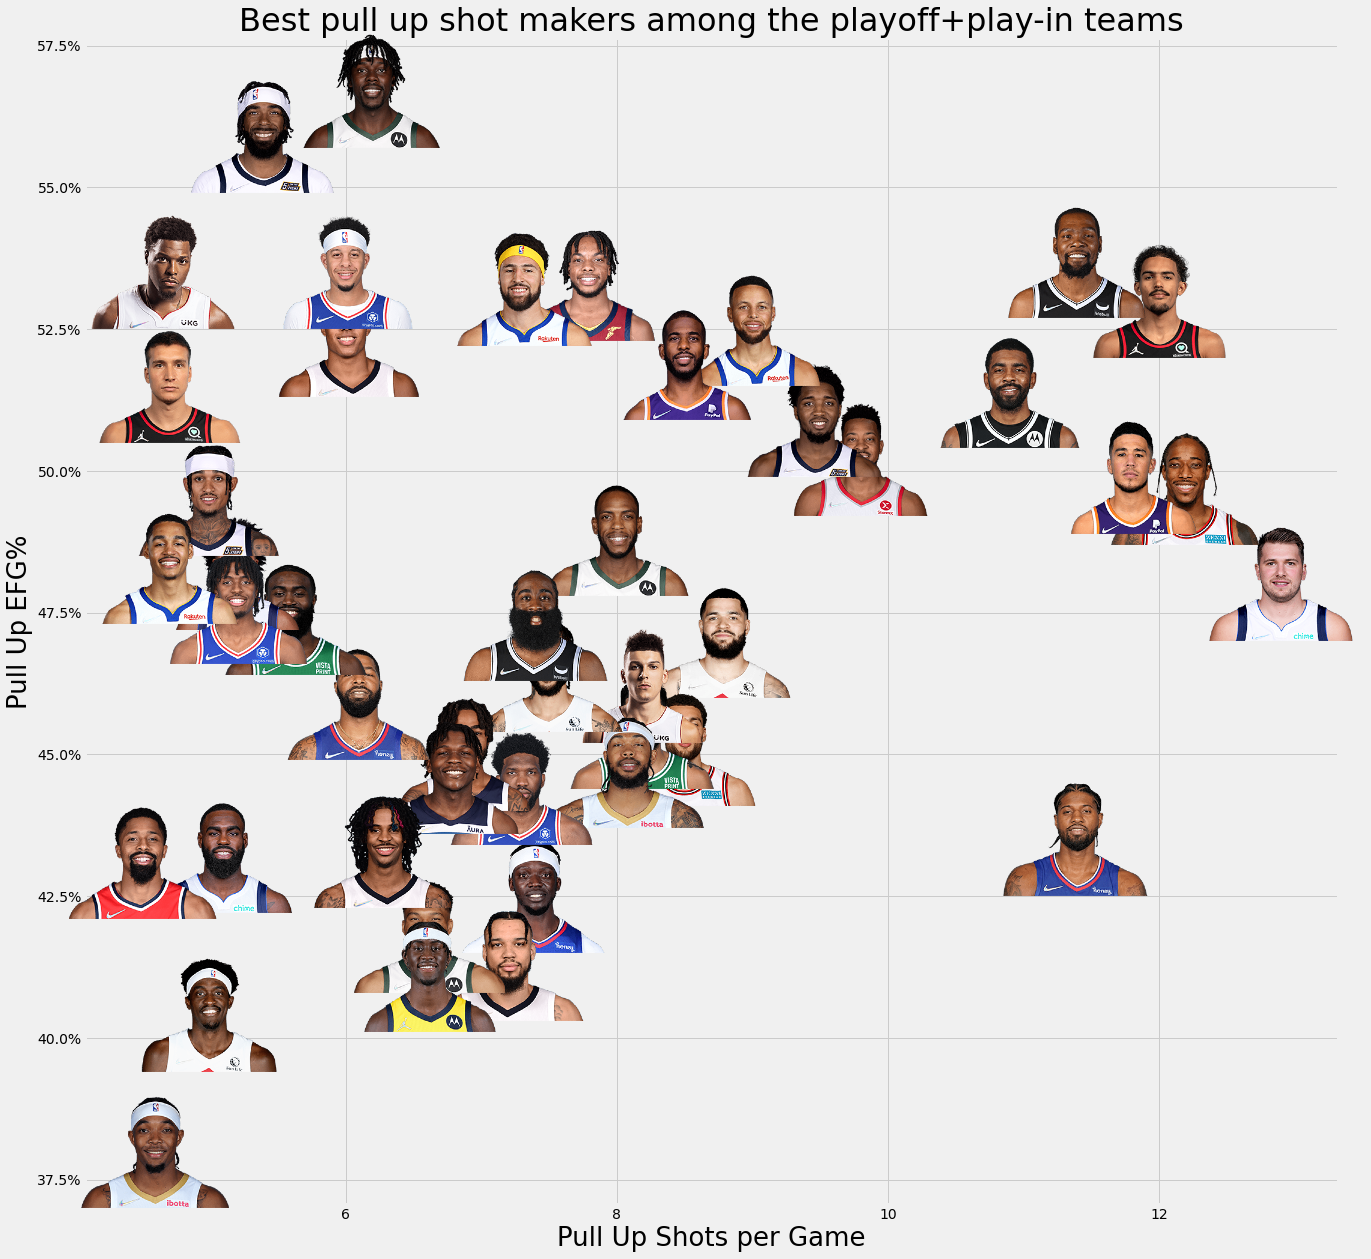

In [40]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(top_players.PULL_UP_FGA, y=top_players.PULL_UP_EFG_PCT, s=10)

for i in range(len(top_players)):
    item = top_players.iloc[i]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (item.PULL_UP_FGA, item.PULL_UP_EFG_PCT), frameon=False)
    ax.add_artist(ab)
    

ax.set_xlabel("Pull Up Shots per Game", size=26)
ax.set_ylabel("Pull Up EFG%", size=26)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Best pull up shot makers among the playoff+play-in teams", size=32)

## Drives

In [42]:
drive_stats = LeagueDashPtStats(season='2021-22', pt_measure_type='Drives', per_mode_simple='PerGame', player_or_team='Player').get_data_frames()[0]

In [43]:
drive_stats.DRIVE_FG_PCT

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,DRIVES,DRIVE_FGM,...,DRIVE_PTS,DRIVE_PTS_PCT,DRIVE_PASSES,DRIVE_PASSES_PCT,DRIVE_AST,DRIVE_AST_PCT,DRIVE_TOV,DRIVE_TOV_PCT,DRIVE_PF,DRIVE_PF_PCT
0,203932,Aaron Gordon,1610612743,DEN,75,46,29,31.7,3.5,0.8,...,2.2,0.641,1.1,0.328,0.2,0.069,0.3,0.089,0.3,0.077
1,1630565,Aaron Henry,1610612755,PHI,6,6,0,2.8,0.2,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000
2,1628988,Aaron Holiday,1610612756,PHX,63,34,29,16.2,6.4,1.2,...,2.9,0.461,2.8,0.446,0.8,0.130,0.5,0.075,0.2,0.037
3,1630174,Aaron Nesmith,1610612738,BOS,52,32,20,11.0,1.3,0.3,...,0.8,0.600,0.5,0.343,0.0,0.014,0.2,0.129,0.1,0.043
4,1630598,Aaron Wiggins,1610612760,OKC,50,13,37,24.2,4.1,0.8,...,2.2,0.552,1.6,0.384,0.3,0.079,0.3,0.074,0.4,0.094
5,1627846,Abdel Nader,1610612756,PHX,14,11,3,10.4,2.1,0.2,...,0.5,0.241,0.6,0.310,0.1,0.069,0.2,0.103,0.1,0.034
6,1630278,Ade Murkey,1610612758,SAC,1,0,1,1.5,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000
7,1629678,Admiral Schofield,1610612753,ORL,38,10,28,12.3,1.2,0.4,...,1.0,0.841,0.3,0.295,0.1,0.091,0.1,0.045,0.1,0.114
8,1629958,Ahmad Caver,1610612754,IND,1,0,1,0.9,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000
9,201143,Al Horford,1610612738,BOS,68,46,22,29.0,1.2,0.3,...,0.9,0.699,0.5,0.446,0.1,0.096,0.0,0.036,0.1,0.108


In [44]:
playoff_only = drive_stats.loc[~drive_stats.TEAM_ABBREVIATION.isin(non_playoff_teams)]

playoff_only = playoff_only.loc[(playoff_only.MIN > 15) & (playoff_only.GP > 20)]

playoff_only.sort_values(by='DRIVE_FGA', ascending=False).iloc[:45].TEAM_ABBREVIATION.value_counts()

UTA    4
MEM    4
PHI    4
BOS    4
DAL    3
MIL    3
LAC    3
PHX    3
MIN    2
NOP    2
MIA    2
BKN    2
CHI    2
CLE    2
TOR    2
GSW    2
ATL    1
Name: TEAM_ABBREVIATION, dtype: int64

In [45]:
top_players = playoff_only.sort_values(by='DRIVE_FGA', ascending=False).iloc[:45]


In [48]:
top_players.loc[:, 'DRIVE_FG_PCT'] = top_players.DRIVE_FG_PCT * 100

Text(0.5, 1.0, 'Efficiency of best players on drives among the playoff+play-in teams')

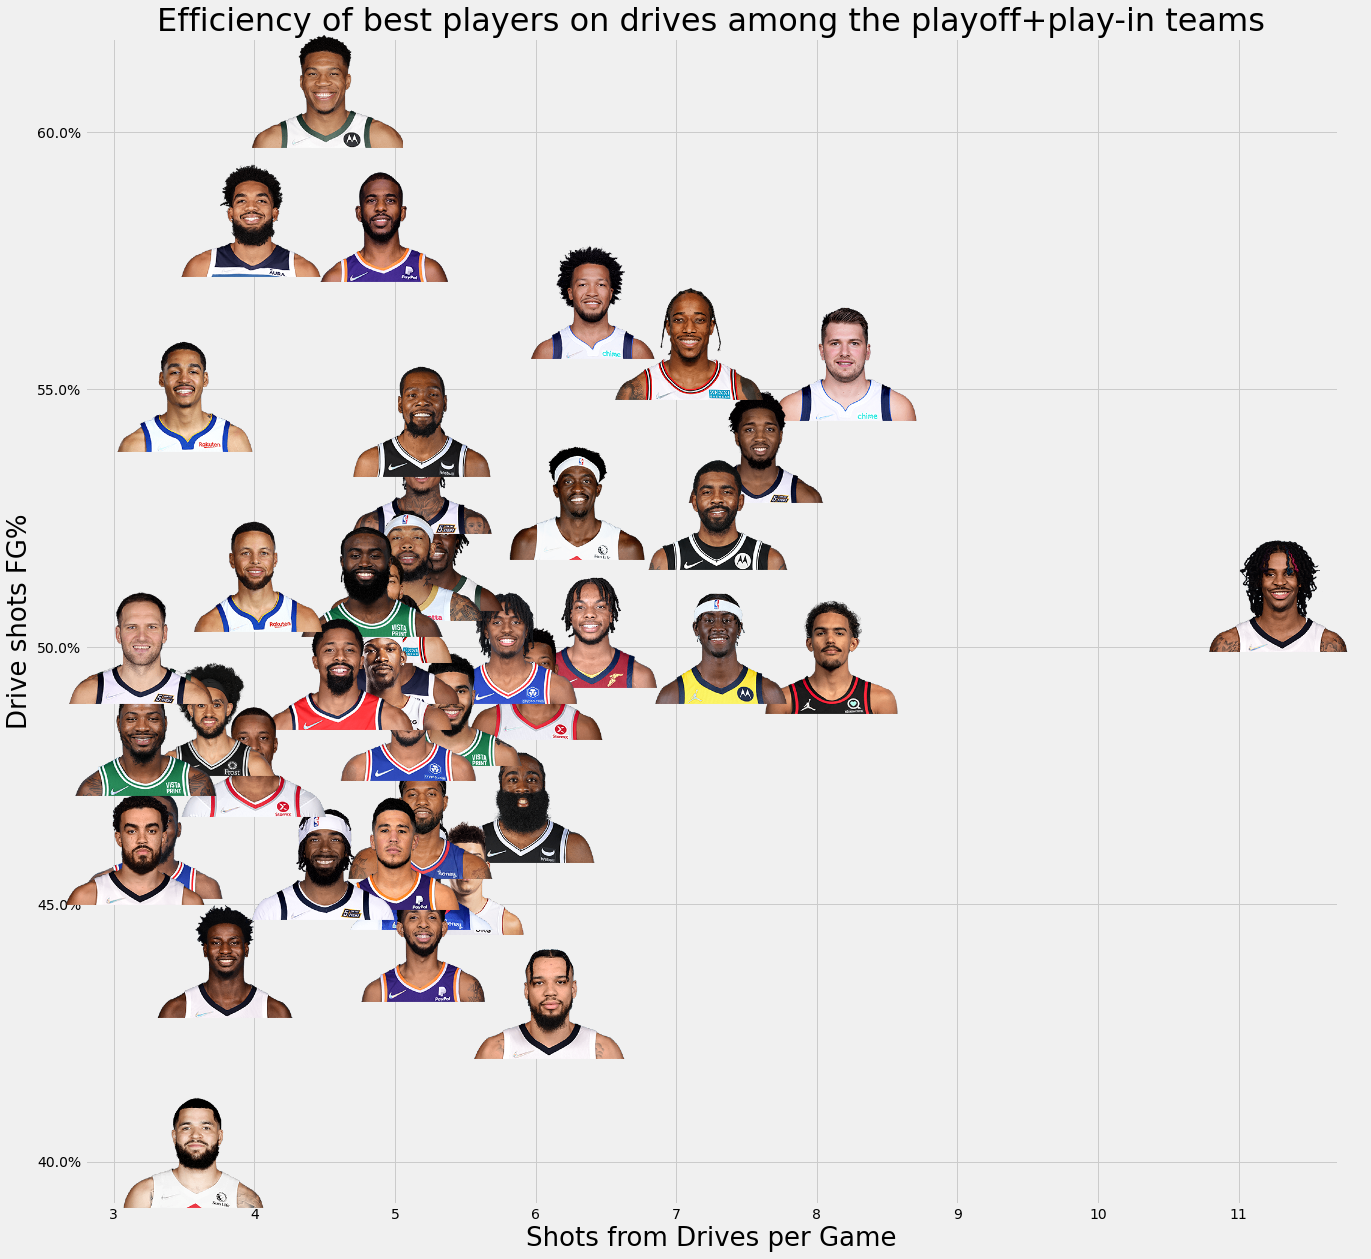

In [49]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(top_players.DRIVE_FGA, y=top_players.DRIVE_FG_PCT, s=10)

for i in range(len(top_players)):
    item = top_players.iloc[i]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (item.DRIVE_FGA, item.DRIVE_FG_PCT), frameon=False)
    ax.add_artist(ab)
    

ax.set_xlabel("Shots from Drives per Game", size=26)
ax.set_ylabel("Drive shots FG%", size=26)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Efficiency of best players on drives among the playoff+play-in teams", size=32)